# From Biological to Artificial Neural Networks

- Artificial Neural Networks (ANNs) were first introduced in **1943** by neurophysiologist **Warren McCulloch** and mathematician **Walter Pitts**. Their foundational paper presented a computational model of how neurons in the brain might work together to perform complex computations, marking the creation of the first ANN architecture. Since then, many other ANN architectures have been developed.

- Artificial Neural Networks (**ANNs**) are inspired by Biological Neural Networks (**BNNs**) in that both involve interconnected nodes (**neurons**) that process information. In BNNs, neurons are biological cells that **transmit signals**, while in ANNs, nodes are **mathematical** functions that simulate these processes to solve complex problems.

- We are seeing renewed interest in ANNs due to several factors:
    - **Abundant Data:** More data is available to train ANNs, enhancing their performance.
    - **Improved Computing Power:** Advances in GPUs and cloud computing allow faster training of large networks.
    - **Better Algorithms:** Slight improvements in training algorithms have significantly boosted performance.
    - **Overcome Limitations:** Theoretical issues like local optima are less problematic in practice.
    - **Funding and Progress:** Successful applications attract more funding, driving further advancements

# The Perceptron Neural Network

- Perceptrons were introduced by **Frank Rosenblatt** in **1957** and are fundamental building blocks in the field of artificial intelligence and machine learning. They can be used for **binary classification** tasks and serve as the basis for more **complex neural network architectures**.

- A perceptron is one of the simplest types of artificial neural networks. It's a computational model inspired by the biological neuron's structure and function. 

    - The perceptron takes **multiple binary inputs**, multiplies each input ($x_i$) by its associated weight  ($w_i$), **sums** these products, and then applies a **step function** to produce a binary output.
        - The formula for the **weighted sum**:
            
            $z = \sum_{i=1}^{n} w_i \cdot x_i + b = \textbf{x}^{T} \textbf{w}$

        - **Step functions** (**Heaviside** step function and **Sign** function)
        
            $\text{sgn}(z) = \begin{cases} -1 & \text{if } z < 0 \\ 0 & \text{if } z = 0 \\ 1 & \text{if } z > 0 \end{cases}$ ,  $\text{step}(z) = \begin{cases}1 & \text{if } z \geq 0 \\0 & \text{if } z < 0\end{cases}$

    - If the **weighted sum** of the inputs **exceeds** a certain **threshold**, the perceptron **activates**, *otherwise*, it remains **inactive**.

    - This process allows the perceptron to learn and make decisions based on input data.

- **Threshold Logic Unit (TLU):** It is a simplified version of the perceptron model. In a Threshold Logic Unit, the output is determined by whether the weighted sum of inputs exceeds a certain threshold. If the weighted sum exceeds the threshold, the TLU outputs one; otherwise, it outputs zero.

In [35]:
'''     
      Input Neurons
       X1        X2
        \        /
        W1      W2
          \   /
      --------------
     |    Σ (Sum)   |  Threshold Logic Unit
     |   Threshold  |          (TLU)
      --------------
           / \ 
          /   \
         /     \
        O       O
      Output Neuron
'''

'     \n      Input Neurons\n       X1        X2\n        \\        /\n        W1      W2\n          \\   /\n      --------------\n     |    Σ (Sum)   |  Threshold Logic Unit\n     |   Threshold  |          (TLU)\n      --------------\n           / \\ \n          /            /             O       O\n      Output Neuron\n'

## Single Threshold Logic Unit (TLU)

- A single Threshold Logic Unit (TLU) can be used for **simple linear binary classification** tasks. In such tasks, the TLU computes a linear combination of the input features and applies a threshold to make a binary decision.

    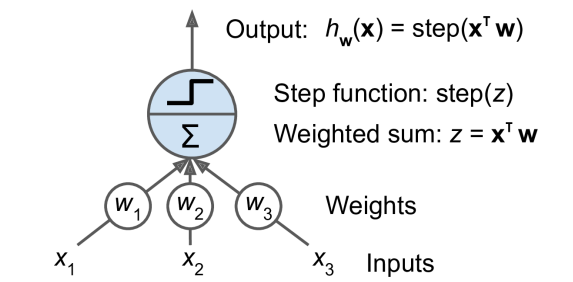

- **Linear binary classification** is a type of classification task where the goal is to classify data into one of two categories based on input features. The term **linear** refers to the nature of the decision boundary that separates the two classes, which is a *straight line* (or *plane* in higher dimensions).



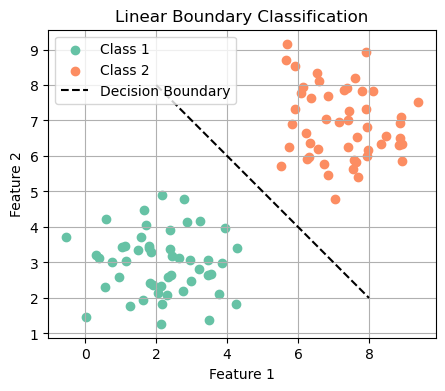

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Generate more example data points for two classes
np.random.seed(0)
class1_x = np.random.normal(2, 1, 50)
class1_y = np.random.normal(3, 1, 50)

class2_x = np.random.normal(7, 1, 50)
class2_y = np.random.normal(7, 1, 50)

# Set figure size
plt.figure(figsize=(5, 4))

# Plot the data points with pastel colors
plt.scatter(class1_x, class1_y, color='#66c2a5', label='Class 1')  # pastel green
plt.scatter(class2_x, class2_y, color='#fc8d62', label='Class 2')  # pastel orange

# Draw a straight line as the decision boundary
plt.plot([2, 8], [8, 2], color='black', linestyle='--', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Boundary Classification')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Single-layer perceptron

- Each TLU is connected to all the inputs, forming a **fully connected layer**. Input neurons pass through input values, and a **bias** feature is commonly added. This Perceptron can classify instances into some binary classes simultaneously, making it a multioutput classifier.

    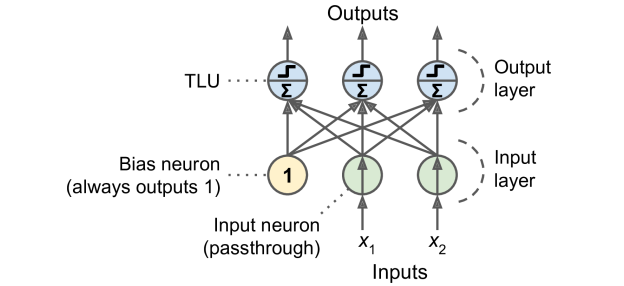

- **Note:** A single layer of Threshold Logic Units (TLUs) can only solve linear classification problems. This means that if the classes in your dataset can be separated by a straight line (or plane in higher dimensions), a single-layer TLU can effectively classify the data. However, if the classes are not linearly separable, meaning they cannot be separated by a straight line, then a single-layer TLU would not be sufficient for accurate classification.


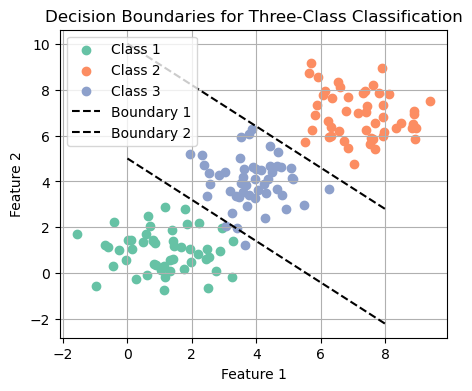

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data points for three classes
np.random.seed(0)
class1_x = np.random.normal(1, 1, 50)
class1_y = np.random.normal(1, 1, 50)

class2_x = np.random.normal(7, 1, 50)
class2_y = np.random.normal(7, 1, 50)

class3_x = np.random.normal(4, 1, 50)
class3_y = np.random.normal(4, 1, 50)

# Set figure size
plt.figure(figsize=(5, 4))

# Plot the data points for each class with pastel colors
plt.scatter(class1_x, class1_y, color='#66c2a5', label='Class 1')  # pastel green
plt.scatter(class2_x, class2_y, color='#fc8d62', label='Class 2')  # pastel orange
plt.scatter(class3_x, class3_y, color='#8da0cb', label='Class 3')  # pastel blue

# Define boundary lines
x_values = np.linspace(0, 8, 100)
boundary_line1 = -0.9 * x_values + 5
boundary_line2 = -0.9 * x_values + 10

# Plot boundary lines
plt.plot(x_values, boundary_line1, color='black', linestyle='--', label='Boundary 1')
plt.plot(x_values, boundary_line2, color='black', linestyle='--', label='Boundary 2')

# Add labels, legend, and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Three-Class Classification')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


* **Computing the outputs of a fully connected layer**

    $h_{W,b} ({X}) = \phi (\mathbf{X} \mathbf{W} + \mathbf{b})$

    $\mathbf{x} = \begin{matrix}
    [x_{1} & x_{2} & \cdots & x_{n}]
    \end{matrix}$ , 
    $\mathbf{W} = \begin{bmatrix}
    w_{1,1} & w_{1,2} & \cdots & w_{1,m} \\
    w_{2,1} & w_{2,2} & \cdots & w_{2,m} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{n,1} & w_{n,2} & \cdots & w_{n,m} \\
    \end{bmatrix}$

    * $ℎ_{𝑊,𝑏}(\mathbf{X})$: This represents the output of the neural network, denoted as ℎ, given the input data 𝑋, where 𝑊 and 𝑏 are the weights and biases of the network, respectively.

    * $𝜙:$ This represents the activation function applied element-wise to the output of the linear transformation $𝑋𝑊+𝑏$. Common activation functions include sigmoid, ReLU, tanh, etc. The choice of activation function depends on the specific problem and the characteristics of the data.





### The Perceptron training algorithm

- The Perceptron training algorithm, inspired by **Hebb’s rule**, adjusts connection weights based on prediction errors. Hebb's rule, summarized by the phrase **"Cells that fire together, wire together,"** suggests that the connection between neurons strengthens when they fire simultaneously. 

- In the Perceptron algorithm, this principle is adapted to **reinforce connections** that **reduce prediction errors**. 

- The Perceptron processes one training instance at a time, and for each incorrect prediction, it adjusts the weights to favor connections that would have led to the correct outcome.


- Perceptron **learning rule** (weight update):

   $w_{i,j}^{(t+1)} = w_{i,j}^{(t)} + \eta (y_j - \hat{y}_j) x_i$

   - $w_{ij}$ is the connection weight between the $i$-th input neuron and the $j$-th output neuron.
   - $x_i$ is the $i$-th input value of the current training instance.
   - $\hat{y}_j$ is the output of the $j$-th output neuron for the current training instance.
   - $y_j$ is the target output of the $j$-th output neuron for the current training instance.
   - $\eta$ is the **learning rate**.


### Implementing Single-layer perceptron (Scikit-Learn)

- The **decision boundary** of each output neuron in a Perceptron is **linear**, making it incapable of learning complex patterns. However, if the training instances are linearly separable, Rosenblatt's Perceptron convergence theorem states that the algorithm will converge to a solution. 

- **Scikit-Learn** offers a Perceptron class that implements a **single-TLU (Threshold Logic Unit)** network, which can be used on datasets such as the **iris dataset**.

    - **Iris dataset:** The 150 samples belong to **three** different species of iris flowers:
        - Iris setosa: 50 samples
        - Iris versicolor: 50 samples
        - Iris virginica: 50 samples
    - The goal of using this dataset is typically to classify the iris species based on the **four features**. *Sepal length* (in centimeters), *Sepal width* (in centimeters), *Petal length* (in centimeters), *Petal width* (in centimeters).


Prediction for [2, 0.5]: [0]


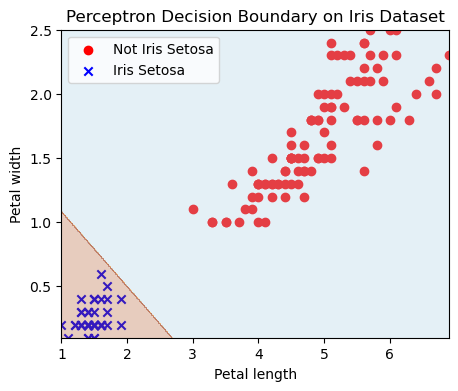

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the iris dataset
iris = load_iris()

# Select petal length and petal width
X = iris.data[:, (2, 3)]

# Create target vector (Iris setosa or not)
y = (iris.target == 0).astype(int)

# Initialize Perceptron classifier
per_clf = Perceptron()

# Fit the classifier to the data
per_clf.fit(X, y)

# Predict the class of a new sample
y_pred = per_clf.predict([[2, 0.5]])

# Print the prediction
print("Prediction for [2, 0.5]:", y_pred)

# Set figure size
plt.figure(figsize=(5, 4))

# Plot the data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Not Iris Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Iris Setosa')

# Plot the decision boundary
# Create a grid of points covering the range of petal length and petal width
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 500),  # Create 500 points from min to max petal length
    np.linspace(X[:, 1].min(), X[:, 1].max(), 500)   # Create 500 points from min to max petal width
)

# Combine the grid points into a shape (500*500, 2) to pass through the classifier
# The ravel() function in NumPy is used to flatten multi-dimensional arrays into a one-dimensional array.
X_new = np.c_[x0.ravel(), x1.ravel()]

# Predict the class for each point in the grid
y_predict = per_clf.predict(X_new)

# Reshape the predictions back into a (500, 500) grid for contour plotting
zz = y_predict.reshape(x0.shape)

# Plot the decision boundary by coloring the regions
plt.contourf(x0, x1, zz, alpha=0.3, cmap=plt.cm.Paired)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title("Perceptron Decision Boundary on Iris Dataset")
plt.show()

### Weaknesses of Perceptrons (XOR)

- In their **1969** monograph "Perceptrons," Marvin Minsky and Seymour Papert highlighted serious weaknesses of Perceptrons, notably their inability to solve certain trivial problems like the Exclusive OR (XOR) classification problem. 

- However, it was discovered that **stacking multiple Perceptrons** could alleviate some of these limitations. This led to the development of the **Multilayer Perceptron (MLP)**, which is capable of solving the **XOR problem**. 

    - In an MLP, multiple layers of neurons are connected in a network, allowing for more complex relationships to be learned. 

    - By appropriately setting the weights of the connections, an MLP can accurately classify inputs, even those that are not linearly separable.

- **For example**, an MLP can solve the XOR problem by correctly outputting 0 for inputs (0, 0) or (1, 1), and 1 for inputs (0, 1) or (1, 0). 

    - This behavior can be achieved by appropriately setting the weights of the connections within the network. 
    - The capability of MLPs to solve such problems revitalized interest in neural networks and paved the way for their widespread use in various applications.

    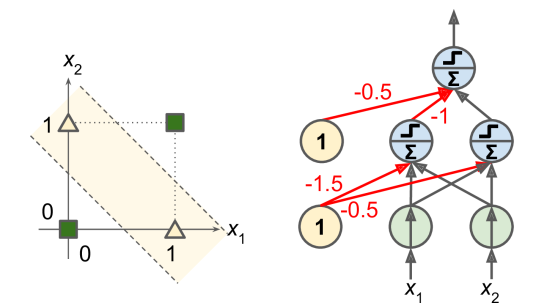

## Multilayer Perceptrons (MLPs)
For more complex tasks that require learning non-linear decision boundaries, a single-layer perceptron is often not sufficient. In such cases, we use multilayer perceptrons (MLPs), which consist of multiple layers of neurons, including input, hidden, and output layers.